In [121]:
%reload_ext autoreload
%autoreload 2

import os 
import sys
import pandas as pd
import numpy as np
import plotly 
import plotly.graph_objects as go

import nltk
nltk.download('stopwords')

try:
    print(run_only_once)
except Exception as e:
    print(os.getcwd())
    os.chdir("./../../")
    print(os.getcwd())
    run_only_once = "Dir has already been changed"

Dir has already been changed


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/damlacinel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
#change the path, if you want to run it in your own device
tweets_df_musk = pd.read_csv("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/data/musk_hashtag_03_01_2023.csv")
tweets_text_musk = tweets_df_musk['text'].to_list()

In [123]:
tweets_df_fitness = pd.read_csv("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/data/fitness_hashtag_08_01_2023.csv")
tweets_text_fitness = tweets_df_fitness['text'].to_list()

In [124]:
tweets_df_trump = pd.read_csv("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/data/trump_hashtag_04_01_2023.csv")
tweets_text_trump = tweets_df_trump['text'].to_list()

In [125]:
tweets_df_netflix = pd.read_csv("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/data/netflix_hashtag_08_01_2023.csv")
tweets_text_netflix = tweets_df_netflix['text'].to_list()

In [126]:
tweets_df_uno = pd.read_csv("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/data/uno_hashtag_09_01_2023.csv")
tweets_text_uno = tweets_df_uno['text'].to_list()

In [127]:
tweets_df_vegan = pd.read_csv("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/data/vegan_hashtag_6_1_2023.csv")
tweets_text_vegan = tweets_df_vegan['text'].to_list()

In [128]:
tweets_df_vegetarian = pd.read_csv("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/data/vegetarian_hashtag_6_1_2023.csv")
tweets_text_vegetarian = tweets_df_vegetarian['text'].to_list()

In [129]:
text_file_neg = open("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/words/negative-words.txt", "r")
negative_words = text_file_neg.read().splitlines()
text_file_neg.close()

text_file_pos = open("/home/damlacinel/Desktop/seminar/impact-of-twitter-take-over-main/words/positive-words.txt", "r")
positive_words = text_file_pos.read().splitlines()
text_file_pos.close()

In [130]:
import numpy as np
NR_SENTIMENTS = 2

#(len(tweets_df_musk)

counts_musk = np.zeros((len(tweets_df_musk), NR_SENTIMENTS), dtype=int)

In [131]:
for idx, sentence in enumerate(tweets_text_musk):
    for word in positive_words:
        if word in sentence:
            counts_musk[idx, 0] += 1
        
    for word in negative_words:
        if word in sentence:
            counts_musk[idx, 1] += 1       

In [132]:
sum_negative_musk = 0
for i in range(len(counts_musk)):
  sum_negative_musk += counts_musk[i,1]

sum_positive_musk = 0
for j in range(len(counts_musk)) :
  sum_positive_musk += counts_musk[j,0]

average_pos_musk = sum_positive_musk / len(counts_musk)
average_neg_musk = sum_negative_musk / len(counts_musk)

In [133]:
import numpy as np
NR_SENTIMENTS = 2

#(len(tweets_df_musk)

counts_fitness = np.zeros((len(tweets_df_fitness), NR_SENTIMENTS), dtype=int)

In [134]:
for idx, sentence in enumerate(tweets_text_fitness):
    for word in positive_words:
        if word in sentence:
            counts_fitness[idx, 0] += 1
        
    for word in negative_words:
        if word in sentence:
            counts_fitness[idx, 1] += 1   

In [135]:
sum_negative_fitness = 0
for i in range(len(counts_fitness)):
  sum_negative_fitness += counts_fitness[i,1]

sum_positive_fitness = 0
for j in range(len(counts_fitness)) :
  sum_positive_fitness += counts_fitness[j,0]

average_pos_fitness = sum_positive_fitness / len(counts_musk)
average_neg_fitness = sum_negative_fitness / len(counts_musk)

In [136]:
import numpy as np
NR_SENTIMENTS = 2

counts_trump = np.zeros((len(tweets_df_trump), NR_SENTIMENTS), dtype=int)

In [137]:
for idx, sentence in enumerate(tweets_text_trump):
    for word in positive_words:
        if word in sentence:
            counts_trump[idx, 0] += 1
        
    for word in negative_words:
        if word in sentence:
            counts_trump[idx, 1] += 1   

In [138]:
sum_negative_trump = 0
for i in range(len(counts_trump)):
  sum_negative_trump += counts_trump[i,1]

sum_positive_trump = 0
for j in range(len(counts_trump)) :
  sum_positive_trump += counts_trump[j,0]

average_pos_trump = sum_positive_trump / len(counts_musk)
average_neg_trump = sum_negative_trump / len(counts_musk)

In [139]:
import numpy as np
NR_SENTIMENTS = 2

counts_netflix = np.zeros((len(tweets_df_netflix), NR_SENTIMENTS), dtype=int)

In [140]:
for idx, sentence in enumerate(tweets_text_netflix):
    for word in positive_words:
        if word in sentence:
            counts_netflix[idx, 0] += 1
        
    for word in negative_words:
        if word in sentence:
            counts_netflix[idx, 1] += 1  

In [141]:
sum_negative_netflix = 0
for i in range(len(counts_netflix)):
  sum_negative_netflix += counts_netflix[i,1]

sum_positive_netflix = 0
for j in range(len(counts_netflix)) :
  sum_positive_netflix += counts_netflix[j,0]

average_pos_netflix = sum_positive_netflix / len(counts_musk)
average_neg_netflix = sum_negative_netflix / len(counts_musk)

In [142]:
import numpy as np
NR_SENTIMENTS = 2

counts_uno = np.zeros((len(tweets_df_uno), NR_SENTIMENTS), dtype=int)

In [143]:
for idx, sentence in enumerate(tweets_text_uno):
    for word in positive_words:
        if word in sentence:
            counts_uno[idx, 0] += 1
        
    for word in negative_words:
        if word in sentence:
            counts_uno[idx, 1] += 1  

In [144]:
sum_negative_uno = 0
for i in range(len(counts_uno)):
  sum_negative_uno += counts_uno[i,1]

sum_positive_uno = 0
for j in range(len(counts_uno)) :
  sum_positive_uno += counts_uno[j,0]

average_pos_uno = sum_positive_uno / len(counts_musk)
average_neg_uno = sum_negative_uno / len(counts_musk)

In [145]:
import numpy as np
NR_SENTIMENTS = 2

counts_vegan = np.zeros((len(tweets_df_vegan), NR_SENTIMENTS), dtype=int)

In [146]:
for idx, sentence in enumerate(tweets_text_vegan):
    for word in positive_words:
        if word in sentence:
            counts_vegan[idx, 0] += 1
        
    for word in negative_words:
        if word in sentence:
            counts_vegan[idx, 1] += 1  

In [147]:
sum_negative_vegan = 0
for i in range(len(counts_vegan)):
  sum_negative_vegan += counts_vegan[i,1]

sum_positive_vegan = 0
for j in range(len(counts_vegan)) :
  sum_positive_vegan += counts_vegan[j,0]

average_pos_vegan = sum_positive_vegan / len(counts_musk)
average_neg_vegan = sum_negative_vegan / len(counts_musk)

In [148]:
import numpy as np
NR_SENTIMENTS = 2

counts_vegetarian = np.zeros((len(tweets_df_vegetarian), NR_SENTIMENTS), dtype=int)

In [149]:
for idx, sentence in enumerate(tweets_text_vegetarian):
    for word in positive_words:
        if word in sentence:
            counts_vegetarian[idx, 0] += 1
        
    for word in negative_words:
        if word in sentence:
            counts_vegetarian[idx, 1] += 1  

In [150]:
sum_negative_vegetarian = 0
for i in range(len(counts_vegetarian)):
  sum_negative_vegetarian += counts_vegetarian[i,1]

sum_positive_vegetarian = 0
for j in range(len(counts_vegetarian)) :
  sum_positive_vegetarian += counts_vegetarian[j,0]

average_pos_vegetarian = sum_positive_vegetarian / len(counts_musk)
average_neg_vegetarian = sum_negative_vegetarian / len(counts_musk)


In [164]:
print("Sum of negative words in #musk : {}".format(sum_negative_musk))
print("Sum of positive words in #musk : {}".format(sum_positive_musk))
print("Sum of negative words in #fitness : {}".format(sum_negative_fitness))
print("Sum of positive words in #fitness : {}".format(sum_positive_fitness))
print("Sum of negative words in #trump : {}".format(sum_negative_trump))
print("Sum of positive words in #trump : {}".format(sum_positive_trump))
print("Sum of negative words in #netflix : {}".format(sum_negative_netflix))
print("Sum of positive words in #netflix : {}".format(sum_positive_netflix))
print("Sum of negative words in #uno : {}".format(sum_negative_uno))
print("Sum of positive words in #uno : {}".format(sum_positive_uno))
print("Sum of negative words in #vegan : {}".format(sum_negative_vegan))
print("Sum of positive words in #vegan : {}".format(sum_positive_vegan))
print("Sum of negative words in #vegetarian : {}".format(sum_negative_vegetarian))
print("Sum of positive words in #vegetarian : {}".format(sum_positive_vegetarian))


Sum of negative words in #musk : 1438353


TypeError: can only concatenate str (not "numpy.int64") to str

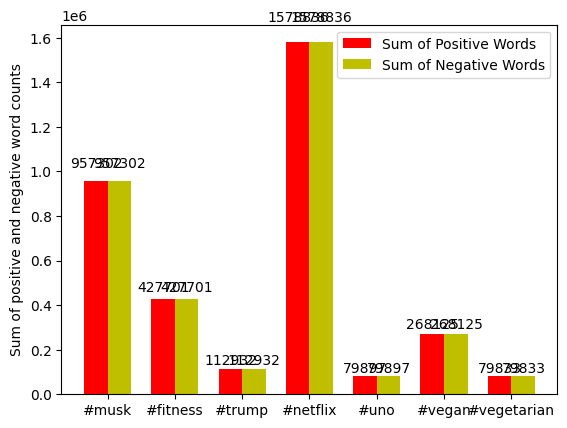

In [162]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
positive_means = (sum_positive_musk,sum_positive_fitness, sum_positive_trump, sum_positive_netflix, sum_positive_uno, sum_positive_vegan, sum_positive_vegetarian)
negative_means = (sum_negative_musk, sum_negative_fitness, sum_negative_trump, sum_negative_netflix, sum_negative_uno, sum_negative_vegan, sum_negative_vegetarian)
ind = np.arange(N)  # the x locations for the groups
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind, positive_means, width, color='r')
rects2 = ax.bar(ind + width, positive_means, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Sum of positive and negative word counts')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('#musk', '#fitness', '#trump', '#netflix', '#uno', '#vegan', '#vegetarian'))

ax.legend((rects1[0], rects2[0]), ('Sum of Positive Words', 'Sum of Negative Words'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/1.95 , 1.05 * height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

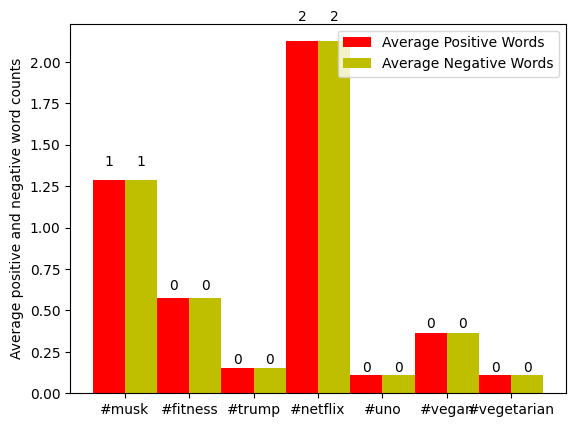

In [151]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
pos_means = (average_pos_musk,average_pos_fitness, average_pos_trump, average_pos_netflix, average_pos_uno, average_pos_vegan, average_pos_vegetarian)
neg_means = (average_neg_musk, average_neg_fitness, average_neg_trump, average_neg_netflix, average_neg_uno, average_neg_vegan, average_neg_vegetarian)
ind = np.arange(N)  # the x locations for the groups
width = 0.5  

fig, ax = plt.subplots()
rects1 = ax.bar(ind, pos_means, width, color='r')
rects2 = ax.bar(ind + width, pos_means, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average positive and negative word counts')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('#musk', '#fitness', '#trump', '#netflix', '#uno', '#vegan', '#vegetarian'))

ax.legend((rects1[0], rects2[0]), ('Average Positive Words', 'Average Negative Words'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

